In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

trf = pd.read_csv(r'C:\Users\asus\Desktop\Acad\courses\summer analytics iitg\data\hackathon\training_set_features.csv')
tef = pd.read_csv(r'C:\Users\asus\Desktop\Acad\courses\summer analytics iitg\data\hackathon\test_set_features.csv')
trl = pd.read_csv(r"C:\Users\asus\Desktop\Acad\courses\summer analytics iitg\data\hackathon\training_set_labels.csv")
submission_format = pd.read_csv(r'C:\Users\asus\Desktop\Acad\courses\summer analytics iitg\data\hackathon\submission_format.csv')


In [3]:
trf.isnull().sum()

respondent_id                      0
xyz_concern                       92
xyz_knowledge                    116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_xyz_vacc_effective       391
opinion_xyz_risk                 388
opinion_xyz_sick_from_vacc       395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [4]:
trf.columns[0:16]

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance'],
      dtype='object')

In [5]:
trf[trf.income_poverty.isnull()]

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
24,24,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,Not Married,Own,Unemployed,oxchjgsf,Non-MSA,2.0,0.0,NaN,NaN
26,26,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,Married,NaN,Employed,mlyzmhmf,"MSA, Principle City",1.0,2.0,ldnlellj,hfxkjkmi
31,31,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Not Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Not Principle City",3.0,0.0,NaN,NaN
38,38,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN
39,39,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26667,26667,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,NaN,Not Married,Rent,Unemployed,dqpwygqj,"MSA, Not Principle City",3.0,1.0,NaN,NaN
26672,26672,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,fpwskwrf,"MSA, Principle City",NaN,NaN,NaN,NaN
26675,26675,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,kbazzjca,Non-MSA,1.0,1.0,NaN,NaN
26696,26696,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,NaN,Married,Own,Employed,bhuqouqj,"MSA, Principle City",1.0,0.0,saaquncn,mxkfnird


In [6]:
def employment(df):
    # Create a mask for rows where 'employment_status' is 'Not in Labor Force'
    mask = df['employment_status'] == "Not in Labor Force"
    df.loc[mask, ['employment_industry', 'employment_occupation']] = "notinlf"
    
    mask1 = df['employment_status'].isnull()
    df.loc[mask1, ['employment_status', 'employment_industry', 'employment_occupation']] = ["Unemployed", "none", "none"]

    mask2 =  df['employment_status'] == "Unemployed"
    df.loc[mask2, ['employment_industry', 'employment_occupation']] = "none"
    return df

def fill_nulls_with_zero(df):
    # Iterate over columns from 1 to 22 (inclusive)
    for column in df.columns[0:16]:  # Adjusting for 0-based indexing
        df[column].fillna("0", inplace=True)
    for column in df.columns[16:22]:  # Adjusting for 0-based indexing
        df[column].fillna("1", inplace=True)
    return df


In [7]:
trf = employment(trf)
trf = fill_nulls_with_zero(trf)

C:\Users\asus\AppData\Local\Temp\ipykernel_14484\1033792281.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[column].fillna("0", inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_14484\1033792281.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[column].fillna("1", inplace=True)


In [8]:
trf["education"].fillna("< 12 Years", inplace=True)
trf.drop('rent_or_own', axis=1, inplace=True)

In [9]:
trf.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,notinlf,notinlf
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,notinlf,notinlf
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [10]:
trf.isnull().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                         0
race                              0
sex                               0
income_poverty                 4423
marital_status              

In [11]:
trf.marital_status.value_counts(dropna=False)

marital_status
Married        13555
Not Married    11744
NaN             1408
Name: count, dtype: int64

In [11]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)
plt.rcParams["figure.figsize"] = (18, 8);

In [12]:
feature_cols = trf.columns
cat_cols = [col for col in feature_cols if trf[col].dtype == 'O']
cont_cols = [col for col in feature_cols if col not in cat_cols]

<Axes: >

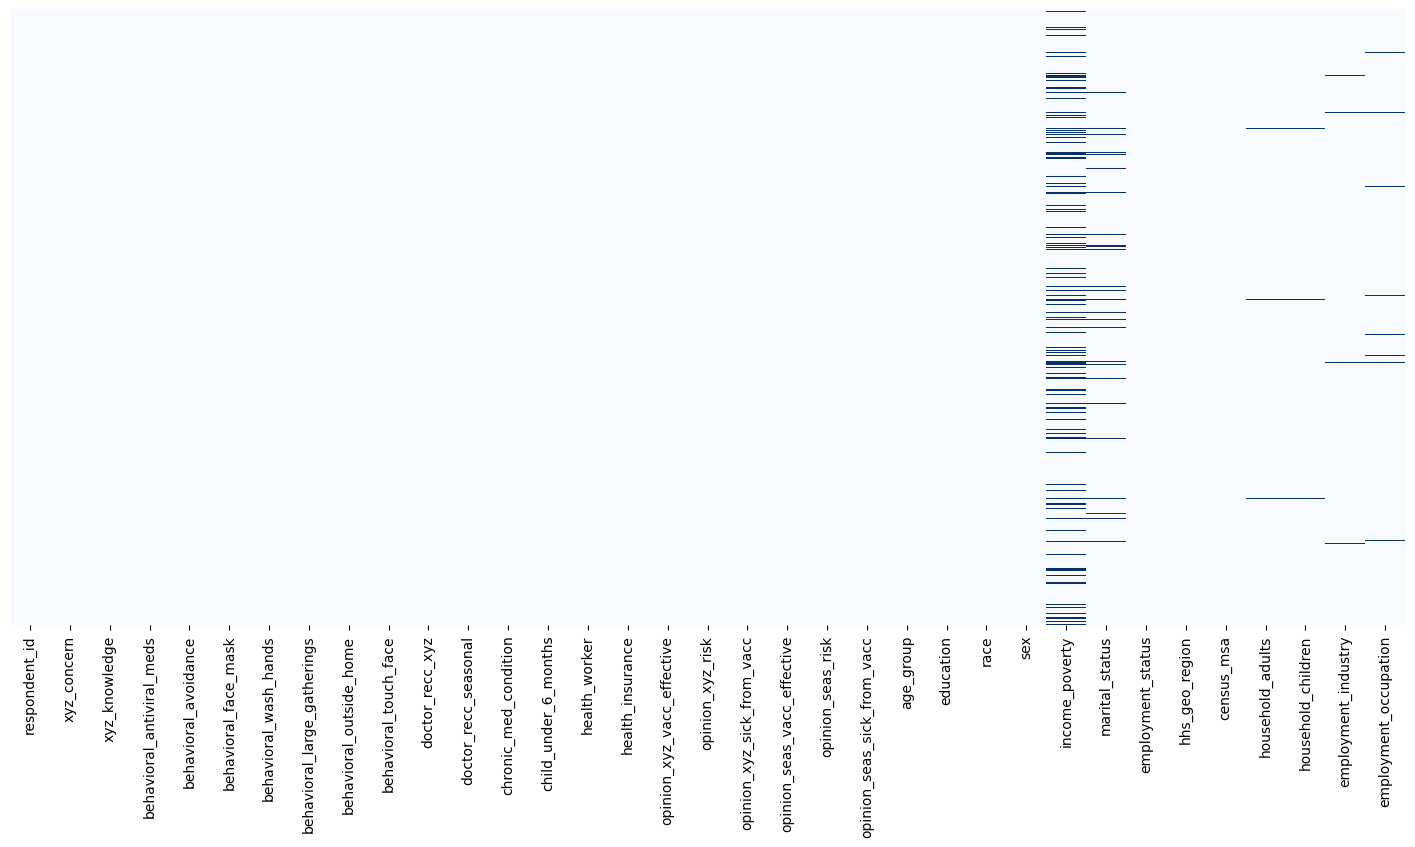

In [13]:
sns.heatmap(trf.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=trf.columns)

In [14]:
trf.employment_industry.value_counts(dropna=False)

employment_industry
notinlf     10231
none         2916
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
NaN           183
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: count, dtype: int64

In [15]:
trf["income_poverty"].fillna("Unknown", inplace=True)
trf["household_adults"].fillna("0", inplace=True)
trf["household_children"].fillna("0", inplace=True)
trf["employment_industry"].fillna("none", inplace=True)
trf["employment_occupation"].fillna("none", inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_14484\4130627487.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  trf["household_adults"].fillna("0", inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_14484\4130627487.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  trf["household_children"].fillna("0", inplace=True)


In [16]:
trf.isnull().sum()

respondent_id                     0
xyz_concern                       0
xyz_knowledge                     0
behavioral_antiviral_meds         0
behavioral_avoidance              0
behavioral_face_mask              0
behavioral_wash_hands             0
behavioral_large_gatherings       0
behavioral_outside_home           0
behavioral_touch_face             0
doctor_recc_xyz                   0
doctor_recc_seasonal              0
chronic_med_condition             0
child_under_6_months              0
health_worker                     0
health_insurance                  0
opinion_xyz_vacc_effective        0
opinion_xyz_risk                  0
opinion_xyz_sick_from_vacc        0
opinion_seas_vacc_effective       0
opinion_seas_risk                 0
opinion_seas_sick_from_vacc       0
age_group                         0
education                         0
race                              0
sex                               0
income_poverty                    0
marital_status              

In [17]:
trf["marital_status"].fillna("Unknown", inplace=True)

In [18]:
trf.dtypes

respondent_id                   int64
xyz_concern                    object
xyz_knowledge                  object
behavioral_antiviral_meds      object
behavioral_avoidance           object
behavioral_face_mask           object
behavioral_wash_hands          object
behavioral_large_gatherings    object
behavioral_outside_home        object
behavioral_touch_face          object
doctor_recc_xyz                object
doctor_recc_seasonal           object
chronic_med_condition          object
child_under_6_months           object
health_worker                  object
health_insurance               object
opinion_xyz_vacc_effective     object
opinion_xyz_risk               object
opinion_xyz_sick_from_vacc     object
opinion_seas_vacc_effective    object
opinion_seas_risk              object
opinion_seas_sick_from_vacc    object
age_group                      object
education                      object
race                           object
sex                            object
income_pover

In [19]:
trf.columns[0:16]

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance'],
      dtype='object')

In [20]:
def column_type(df, st_col, end_col):
    for column in df.columns[st_col: end_col]:
        df[column] = df[column].astype(int)
    return df 

In [21]:
trf = column_type(trf, 0, 22)

In [22]:
trf.dtypes

respondent_id                   int32
xyz_concern                     int32
xyz_knowledge                   int32
behavioral_antiviral_meds       int32
behavioral_avoidance            int32
behavioral_face_mask            int32
behavioral_wash_hands           int32
behavioral_large_gatherings     int32
behavioral_outside_home         int32
behavioral_touch_face           int32
doctor_recc_xyz                 int32
doctor_recc_seasonal            int32
chronic_med_condition           int32
child_under_6_months            int32
health_worker                   int32
health_insurance                int32
opinion_xyz_vacc_effective      int32
opinion_xyz_risk                int32
opinion_xyz_sick_from_vacc      int32
opinion_seas_vacc_effective     int32
opinion_seas_risk               int32
opinion_seas_sick_from_vacc     int32
age_group                      object
education                      object
race                           object
sex                            object
income_pover

In [23]:
trf = column_type(trf, 32, 33)

In [24]:
def label_encode_columns(df, start_col, end_col):
    le = LabelEncoder()
    for col in df.columns[start_col:end_col+1]:
        if df[col].dtype == 'object':
            df[col + '_encoded'] = le.fit_transform(df[col]) + 1  # Add 1 to start from 1
    return df

In [25]:
trf = label_encode_columns(trf,22,30)

In [26]:
trf.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,age_group_encoded,education_encoded,race_encoded,sex_encoded,income_poverty_encoded,marital_status_encoded,employment_status_encoded,hhs_geo_region_encoded,census_msa_encoded
0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,2,2,1,2,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0,notinlf,notinlf,4,2,4,1,3,2,2,9,3
1,1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,4,4,2,4,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0,pxcmvdjn,xgwztkwe,2,1,4,2,3,2,1,2,1
2,2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,3,1,1,4,1,2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Employed,qufhixun,"MSA, Not Principle City",2.0,0,rucpziij,xtkaffoo,1,3,4,2,1,2,1,10,1
3,3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,0,3,3,5,5,4,1,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0,notinlf,notinlf,5,1,4,1,3,2,2,6,2
4,4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,0,3,3,2,3,1,4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Employed,qufhixun,"MSA, Not Principle City",1.0,0,wxleyezf,emcorrxb,3,4,4,1,1,1,1,10,1


In [27]:
trf.columns[30]

'census_msa'

In [28]:
trf = label_encode_columns(trf,33,34)
trf.shape

(26707, 46)

In [29]:
trf.household_adults = trf.household_adults.astype(int)

In [30]:
trf.household_adults.value_counts()

household_adults
1    14474
0     8305
2     2803
3     1125
Name: count, dtype: int64

In [31]:
trf.dtypes

respondent_id                     int32
xyz_concern                       int32
xyz_knowledge                     int32
behavioral_antiviral_meds         int32
behavioral_avoidance              int32
behavioral_face_mask              int32
behavioral_wash_hands             int32
behavioral_large_gatherings       int32
behavioral_outside_home           int32
behavioral_touch_face             int32
doctor_recc_xyz                   int32
doctor_recc_seasonal              int32
chronic_med_condition             int32
child_under_6_months              int32
health_worker                     int32
health_insurance                  int32
opinion_xyz_vacc_effective        int32
opinion_xyz_risk                  int32
opinion_xyz_sick_from_vacc        int32
opinion_seas_vacc_effective       int32
opinion_seas_risk                 int32
opinion_seas_sick_from_vacc       int32
age_group                        object
education                        object
race                             object


In [32]:
trf.columns[31]

'household_adults'

In [33]:
t = trf.drop(trf.columns[22:31], axis=1)
t.dtypes

respondent_id                     int32
xyz_concern                       int32
xyz_knowledge                     int32
behavioral_antiviral_meds         int32
behavioral_avoidance              int32
behavioral_face_mask              int32
behavioral_wash_hands             int32
behavioral_large_gatherings       int32
behavioral_outside_home           int32
behavioral_touch_face             int32
doctor_recc_xyz                   int32
doctor_recc_seasonal              int32
chronic_med_condition             int32
child_under_6_months              int32
health_worker                     int32
health_insurance                  int32
opinion_xyz_vacc_effective        int32
opinion_xyz_risk                  int32
opinion_xyz_sick_from_vacc        int32
opinion_seas_vacc_effective       int32
opinion_seas_risk                 int32
opinion_seas_sick_from_vacc       int32
household_adults                  int32
household_children                int32
employment_industry              object


In [34]:
t.drop(t.columns[24:26], axis=1, inplace=True)

In [35]:
t.shape

(26707, 35)

<Axes: >

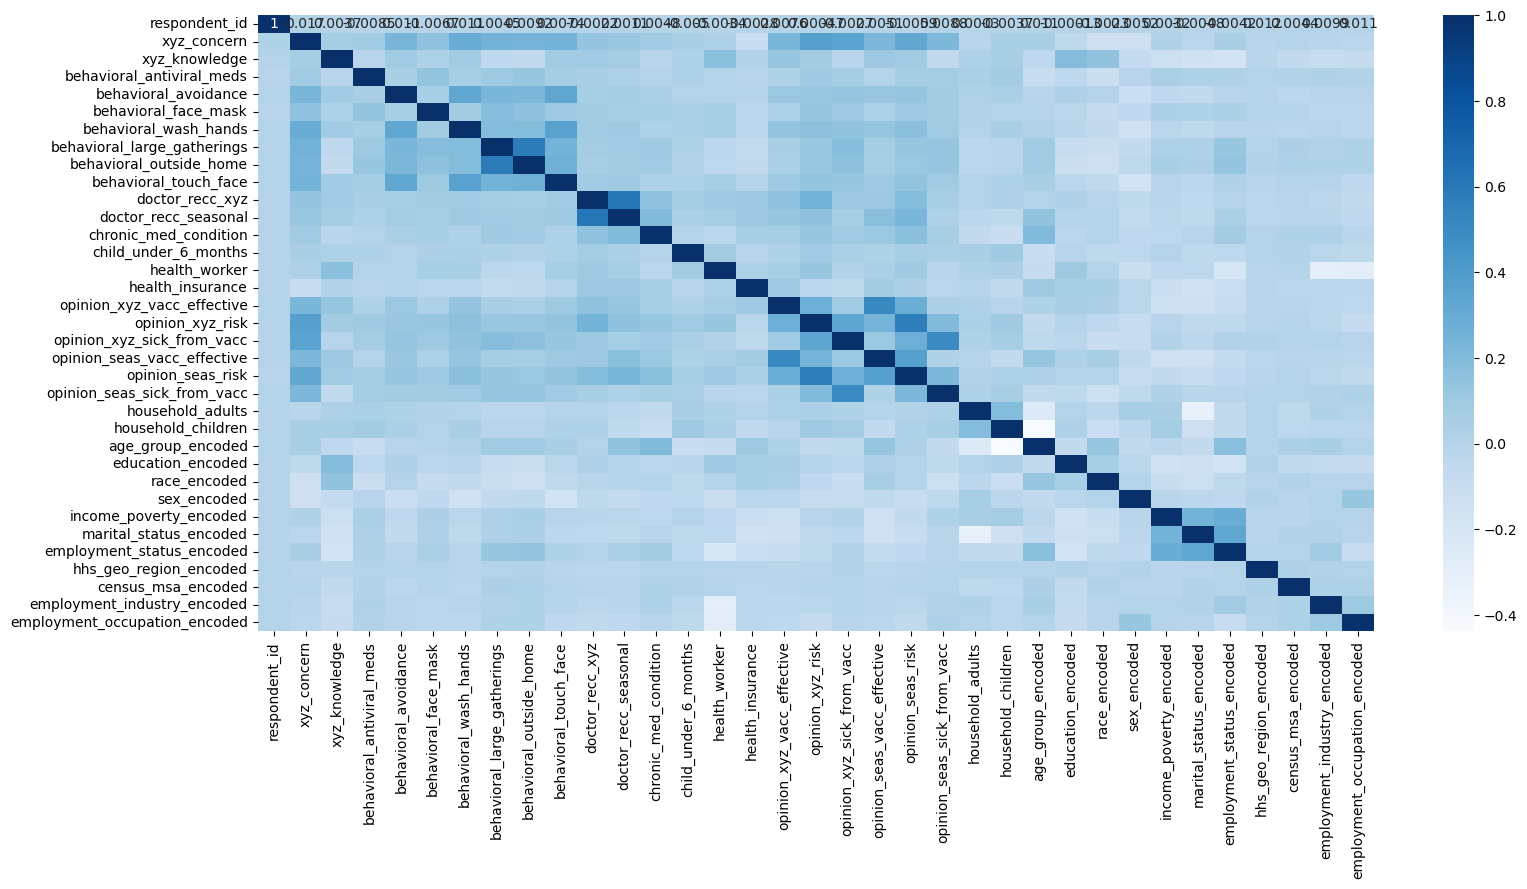

In [36]:
t.corr()
sns.heatmap(t.corr(), cmap='Blues', annot=True)

In [37]:
trl.columns

Index(['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'], dtype='object')

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='doctor_recc_xyz', ylabel='xyz_vaccine'>

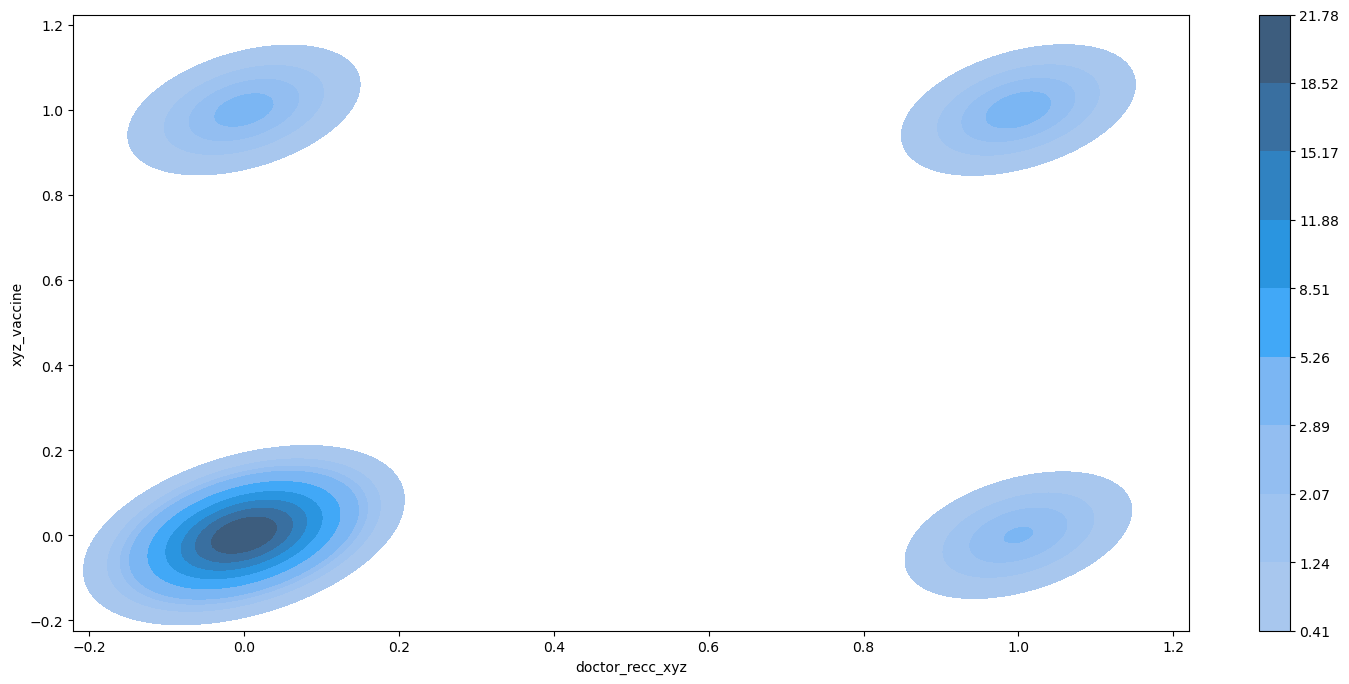

In [38]:
sns.kdeplot(x=t.doctor_recc_xyz, y=trl.xyz_vaccine, n_levels=10, fill=True, cbar=True)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import RidgeClassifier


In [40]:
trl1 = trl.drop("respondent_id", axis=1)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(t, trl, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [43]:
reg.score(X_test, y_test)

0.5487081598906158

In [44]:
reg.score(X_train,y_train)

0.5453030527612291

In [45]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)

lasso_reg.score(X_test, y_test)

0.33323392622130593

In [46]:
ridge_reg = linear_model.Ridge(alpha=50, max_iter=100,tol=0.1)
ridge_reg.fit(X_train,y_train)

ridge_reg.score(X_test, y_test)

0.5485975587830697

In [62]:
# # Scaling features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

In [82]:
# gnb_classifier = OneVsRestClassifier(GaussianNB())
# gnb_classifier.fit(X_train, y_train)
# gnb_pred = gnb_classifier.predict(X_test)

In [83]:
#classification_report(y_test, gnb_pred)

In [ ]:
# # Initialize the base classifier
# base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Use MultiOutputClassifier to handle multilabel classification
# multi_target_classifier = MultiOutputClassifier(base_classifier, n_jobs=-1)

# # Train the model
# multi_target_classifier.fit(X_train_scaled, y_train)

In [48]:
tef.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [49]:
tef.isnull().sum()

respondent_id                      0
xyz_concern                       85
xyz_knowledge                    122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_xyz                 2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_xyz_vacc_effective       398
opinion_xyz_risk                 380
opinion_xyz_sick_from_vacc       375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

In [50]:
tef = employment(tef)
tef = fill_nulls_with_zero(tef)

C:\Users\asus\AppData\Local\Temp\ipykernel_14484\1033792281.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[column].fillna("0", inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_14484\1033792281.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[column].fillna("1", inplace=True)


In [53]:
tef["education"].fillna("< 12 Years", inplace=True)
tef.drop('rent_or_own', axis=1, inplace=True)

In [55]:
tef["income_poverty"].fillna("Unknown", inplace=True)
tef["household_adults"].fillna("0", inplace=True)
tef["household_children"].fillna("0", inplace=True)
tef["employment_industry"].fillna("none", inplace=True)
tef["employment_occupation"].fillna("none", inplace=True)
tef["marital_status"].fillna("Unknown", inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_14484\38018605.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tef["household_adults"].fillna("0", inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_14484\38018605.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tef["household_children"].fillna("0", inplace=True)


In [56]:
tef = column_type(tef, 0, 22)
tef = column_type(tef, 32, 33)
tef.dtypes

respondent_id                   int32
xyz_concern                     int32
xyz_knowledge                   int32
behavioral_antiviral_meds       int32
behavioral_avoidance            int32
behavioral_face_mask            int32
behavioral_wash_hands           int32
behavioral_large_gatherings     int32
behavioral_outside_home         int32
behavioral_touch_face           int32
doctor_recc_xyz                 int32
doctor_recc_seasonal            int32
chronic_med_condition           int32
child_under_6_months            int32
health_worker                   int32
health_insurance                int32
opinion_xyz_vacc_effective      int32
opinion_xyz_risk                int32
opinion_xyz_sick_from_vacc      int32
opinion_seas_vacc_effective     int32
opinion_seas_risk               int32
opinion_seas_sick_from_vacc     int32
age_group                      object
education                      object
race                           object
sex                            object
income_pover

In [68]:
tef = label_encode_columns(tef,22,30)

In [69]:
tef = label_encode_columns(tef,33,34)
tef.shape

(26708, 46)

In [70]:
tef.household_adults = tef.household_adults.astype(int)

In [71]:
tf = tef.drop(tef.columns[22:31], axis=1)
tf.dtypes

respondent_id                     int32
xyz_concern                       int32
xyz_knowledge                     int32
behavioral_antiviral_meds         int32
behavioral_avoidance              int32
behavioral_face_mask              int32
behavioral_wash_hands             int32
behavioral_large_gatherings       int32
behavioral_outside_home           int32
behavioral_touch_face             int32
doctor_recc_xyz                   int32
doctor_recc_seasonal              int32
chronic_med_condition             int32
child_under_6_months              int32
health_worker                     int32
health_insurance                  int32
opinion_xyz_vacc_effective        int32
opinion_xyz_risk                  int32
opinion_xyz_sick_from_vacc        int32
opinion_seas_vacc_effective       int32
opinion_seas_risk                 int32
opinion_seas_sick_from_vacc       int32
household_adults                  int32
household_children                int32
employment_industry              object


In [72]:
tf.drop(tf.columns[24:26], axis=1, inplace=True)

In [73]:
t.shape

(26707, 35)

In [74]:
tf.shape

(26708, 35)

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
X_test1 = tf
y_test1 = submission_format
y_test1.dtypes

respondent_id         int64
h1n1_vaccine        float64
seasonal_vaccine    float64
dtype: object

In [83]:
reg.score(X_test1,y_test1)

0.3333333333333333

In [95]:
import joblib

In [96]:
from sklearn.multioutput import MultiOutputRegressor

In [97]:
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [99]:
# Load the trained model
trained_model = joblib.load('trained_model.pkl')

# Predict using the trained model
test_predictions = trained_model.predict(tf)

predictions_df = pd.DataFrame(test_predictions, columns=[f'Predicted_{i}' for i in range(test_predictions.shape[1])])
#result_df = pd.concat([tf, predictions_df], axis=1)

# Save the combined DataFrame to a CSV file
predictions_df.to_csv('predicted_test_set.csv', index=False)